# **1. Import Required Libraries**

In [ ]:
import spacy
import pandas as pd
import matplotlib.pyplot as plt
from spacy import displacy
import kagglehub
import os

# **2. Load the Dataset**

In [ ]:
path = kagglehub.dataset_download("abhinavwalia95/entity-annotated-corpus")
print("Path to dataset files:", path)

100%|██████████| 26.4M/26.4M [00:00<00:00, 136MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/abhinavwalia95/entity-annotated-corpus/versions/4


In [ ]:
df = pd.read_csv(os.path.join(path, "ner_dataset.csv"), encoding='latin1')
df.head()

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,NaN,of,IN,O
2,NaN,demonstrators,NNS,O
3,NaN,have,VBP,O
4,NaN,marched,VBN,O


# **3. Inspect and Clean the Data**

In [ ]:
df.dropna(inplace=True)
print(df.columns)

Index(['Sentence #', 'Word', 'POS', 'Tag'], dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47949 entries, 0 to 1048567
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Sentence #  47949 non-null  object
 1   Word        47949 non-null  object
 2   POS         47949 non-null  object
 3   Tag         47949 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [ ]:
data = df.groupby('Sentence #')['Word'].apply(' '.join).values
sentences = list(data)
len(sentences)

47949

# **4. Load spaCy Pretrained Model**

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 95.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp = spacy.load("en_core_web_sm")

# **5. Perform Named Entity Recognition**

In [ ]:
text = sentences[0]
doc = nlp(text)

In [ ]:
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

Thousands  |  CARDINAL


# **6. Visualize Named Entities**

In [ ]:
displacy.render(doc, style="ent", jupyter=True)

In [ ]:
# text = "Barack Obama visited Cairo in 2009 to give a speech at Cairo University."
# doc = nlp(text)
# displacy.render(doc, style="ent", jupyter=True)

# **7. Bonus (Compare Two spaCy Models):**

In [ ]:
!python -m spacy download en_core_web_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 19.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
nlp_md = spacy.load("en_core_web_md")

In [ ]:
doc_md = nlp_md(text)
displacy.render(doc_md, style="ent", jupyter=True)

# **8. Bouns (Entity Frequency Visualization):**

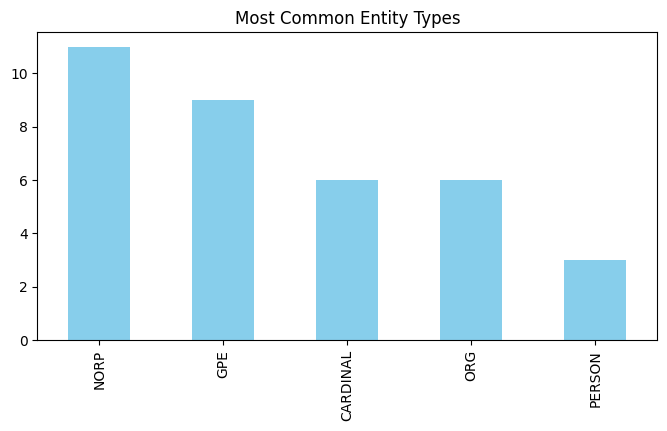

In [ ]:
entities = [ent.label_ for doc in nlp.pipe(sentences[:200]) for ent in doc.ents]
pd.Series(entities).value_counts().head(10).plot(kind='bar', figsize=(8,4), color='skyblue')
plt.title("Most Common Entity Types")
plt.show()

# **Save and Export Results**

In [ ]:
results = []

for sent in sentences[:100]:
    doc = nlp(sent)
    for ent in doc.ents:
        results.append([sent, ent.text, ent.label_])

In [ ]:
entities_df = pd.DataFrame(results, columns=['Sentence', 'Entity', 'Type'])
entities_df.to_csv("named_entities.csv", index=False)